### 실습 개요
- 다양한 속성을 가진 이미지 array(3차원)를 생성하고 시각화합니다.
- 다양한 이미지 array들 간에 유사도를 측정합니다.
- Video array의 연속되는 두 이미지(frame)들 간의 유사도의 의미를 분석합니다.

### 사전준비
- functions.py 안에 mp4 파일 decoding 함수들을 import
- numpy를 import

In [1]:
# functions.py 에 미리 정의된 함수들을 import 한다
from functions import video_2_ndarray

# numpy를 import 한다
import numpy as np

- mp4 file의 video data를 ndarray(N-dimensional Array) 변수에 저장하기

In [2]:
"""
함수 video_2_ndarray 를 사용하여 ../media/SampleVideo_640x360_5mb.mp4 의 video data를
ndarray 에 저장한다.
"""
video_array, _, _ = video_2_ndarray('../media/SampleVideo_640x360_5mb.mp4')

### 따라 해보기 #1. 다차원 array(여기서는 video frame)들 간 유사도 측정하기

#### 1. 다양한 test image array 들을 생성
- 세로 : 360, 가로 : 640 사이즈의 다양한 test image array 들을 생성

In [33]:
# noisy image 2개
noise1 = np.random.randint(0, 255, size=(360, 640, 3), dtype=np.uint8)
noise2 = np.random.randint(0, 255, size=(360, 640, 3), dtype=np.uint8)

# R, G, B 값 중 하나는 최대(255), 나머지는 최소(0)
red = np.full((360, 640, 3), (255, 0, 0), dtype=np.uint8)
blue = np.full((360, 640, 3), (0, 0, 255), dtype=np.uint8)

# R, G, B 값이 200 ~ 225 사이 분포 (밝은색)
light1 = np.random.randint(200, 225, size=(360, 640, 3), dtype=np.uint8)
light2 = np.random.randint(200, 225, size=(360, 640, 3), dtype=np.uint8)

# R, G, B 값이 25 ~ 50 사이 분포 (어두운색)
dark1 = np.random.randint(25, 50, size=(360, 640, 3), dtype=np.uint8)
dark2 = np.random.randint(25, 50, size=(360, 640, 3), dtype=np.uint8)

In [27]:
# Numpy Array의 shape와 size 확인
print(f"noise1 shape : {noise1.shape}, size : {noise1.size}")
print(f"red shape : {red.shape}, size : {red.size}")
print(f"light1 shape : {light1.shape}, size : {light1.size}")
print(f"dark1 shape : {dark1.shape}, size : {dark1.size}")

noise1 shape : (360, 640, 3), size : 691200
red shape : (360, 640, 3), size : 691200
light1 shape : (360, 640, 3), size : 691200
dark1 shape : (360, 640, 3), size : 691200
gray_noise1 shape : (360, 640, 3), size : 691200


#### 2. test image array들 출력

In [28]:
from matplotlib import pyplot as plt

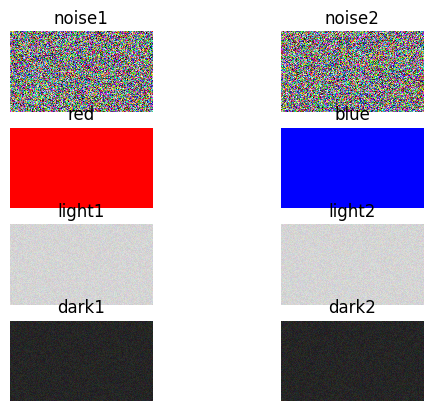

In [39]:
images = [(noise1, 'noise1'), (noise2, 'noise2'), (red, 'red'), (blue, 'blue'),
          (light1, 'light1'), (light2, 'light2'), (dark1, 'dark1'), (dark2, 'dark2')]

rows, columns = 4, 2

for i, (img, title) in enumerate(images, 1):
    plt.subplot(rows, columns, i)
    plt.imshow(img, interpolation='nearest')
    plt.title(title)
    plt.axis('off')

#### 3. test image들 간의 유사성을 측정하기 위해 test image들을 가공하기
- 평탄화(Flattening)
    - 다차원 배열을 벡터(1차원)로 변환하여 벡터의 내적, 노름(norm)등 벡터 연산이 가능하게 함
- 최소-최대 정규화(Min-Max Normalization)
    - 가장 작은 값을 0, 가장 큰 값을 1로 두고, 나머지 값들은 비율을 맞춰서 모두 0과 1 사이의 값으로 스케일링. 

In [35]:
# 다차원를 1차원으로 평탄화(Flattening)한다.
noisy1_vector = noise1.reshape(-1)

# 그 결과를 255로 나누어 각 항목의 값이 0 ~ 1 사이의 float 값을 가지도록 최소-최대 정규화(Min-Max Normalization)한다.
# 공식 : (x - min) / (max - min) = (x - 0) / (255 - 0) = x / 255
noisy1_vector = noisy1_vector/255

noisy2_vector = noise2.reshape(-1)/255

red_vector = red.reshape(-1)/255
blue_vector = blue.reshape(-1)/255

light1_vector = light1.reshape(-1)/255
light2_vector = light2.reshape(-1)/255
dark1_vector = dark1.reshape(-1)/255
dark2_vector = dark2.reshape(-1)/255

# 0 ~ 1사이 난수 출력
print(f"noisy1_vector shape : {noisy1_vector.shape}, size : {noisy1_vector.size}, \n value : {noisy1_vector}\n")

# 1에 근접하는 동일한 값 출력
print(f"light1_vector shape : {light1_vector.shape}, size : {light1_vector.size}, \n value : {light1_vector}\n")

# 0에 가까운 동일한 값 출력
print(f"dark1_vector shape : {dark1_vector.shape}, size : {dark1_vector.size}, \n value : {dark1_vector}\n")

# 0, 0, 1, 0, 0, 1... 반복 출력
print(f"blue_vector shape : {blue_vector.shape}, size : {blue_vector.size}, \n value : {blue_vector}\n")

noisy1_vector shape : (691200,), size : 691200, 
 value[0.4627451  0.74509804 0.39215686 ... 0.52941176 0.25882353 0.99215686]

light1_vector shape : (691200,), size : 691200, 
 value[0.83529412 0.8745098  0.8        ... 0.8745098  0.78431373 0.81176471]

dark1_vector shape : (691200,), size : 691200, 
 value[0.16078431 0.10588235 0.1254902  ... 0.10588235 0.18039216 0.10196078]

blue_vector shape : (691200,), size : 691200, 
 value[0. 0. 1. ... 0. 0. 1.]

gray_noisy1_vector shape : (691200,), size : 691200, 
 value[0.47058824 0.47058824 0.47058824 ... 0.21568627 0.21568627 0.21568627]



#### 4. 쉽고 간단한 유사도 측정 방법 cosine similatiry

In [31]:
from numpy import dot
from numpy.linalg import norm

# cosine similatiry 함수
def cos_sim(A, B):
    return dot(A, B) / (norm(A) * norm(B))

- 그림 : cosine similarity 함수 이해

    ![Alt text for broken image link](../resources/cosine-similarity-vectors.jpg)
    - image vector의 모든 값은 0 ~ 1 이므로 마이너스 유사도(opposite vectors)는 나타나지 않음. 최소값은 0

#### 5. cosine similatiry 함수를 사용한 유사도 구하기

In [36]:
# dark1과 dark2 간 유사도
print('dark1과 dark2 간 유사도 : ', cos_sim(dark1_vector, dark2_vector))

# light1과 light2 간 유사도
print('light1과 light2 간 유사도 : ', cos_sim(light1_vector, light2_vector))

# dark와 light 간 유사도
print('dark와 light 간 유사도 : ', cos_sim(dark1_vector, light1_vector))

# 두 noise 간 유사도
print('두 noise 간 유사도 : ', cos_sim(noisy1_vector, noisy2_vector))

# red와 blue 간 유사도
print('red와 blue 간 유사도 : ', cos_sim(red_vector, blue_vector))

dark1과 dark2 간 유사도 :  0.9632905485485393
light1과 light2 간 유사도 :  0.9988466313234162
dark와 light 간 유사도 :  0.9809168542554074
두 noise 간 유사도 :  0.748597226735371
두 흑백 noise 간 유사도 :  0.7485993622233348
red와 blue 간 유사도 :  0.0


### 따라 해보기 #2. 동영상의 연속되는 두 frame들간의 유사도 측정하기

#### 1. 연속되는 두 frame들간의 유사도를 구해서 차례로 list에 저장

In [ ]:
# 방법 #1 : 일반적인 반복문 사용

# 이전 프레임 vector  초기화
prev_vector = None

# 유사도 값을 저장할 list 변수 초기화
similarity_list = []

# 각 프레임별로 처리
for frame in video_array:

    # 평탄화(Flattening) 및 최소-최대 정규화(Min-Max Normalization)
    # 1차원으로 reshape하고 255로 나눔
    current_vector = frame.reshape(-1) / 255

    # 첫번째 frame인 경우 건너뜀
    if prev_vector is not None:
        # 유사도 계산 및 similarity_list에 append
        similarity = cos_sim(prev_vector, current_vector)
        similarity_list.append(similarity)
            
    # 이전 프레임 vector를 현재 vector로 업데이트
    prev_vector = current_vector.copy()

print('vector size : ',current_vector.shape)
print('similarity_list : ',similarity_list)

In [ ]:
# 방법 #2 : 컴프리헨션(Comprehension) 사용

# 평탄화(Flattening) 및 최소-최대 정규화(Min-Max Normalization)
modi_video = video_array.reshape(video_array.shape[0], -1) / 255

# 유사도 list 생성
similarity_list = [ cos_sim(modi_video[i-1], c) for i, c in enumerate(modi_video[1:], start=1) ]

In [ ]:
# similarity_list 꺾은선 그래프 그리기

plt.figure(figsize=(10, 6))
plt.plot(range(len(similarity_list)), similarity_list, marker='o', linestyle='-', color='b')
plt.xlabel('Frame Number')
plt.ylabel('Similarity')
plt.title('Similarity vs Frame Number')
plt.grid(True)

#### 2. 연속되는 frame들 중 유사도가 낮은 frame들 출력하기

In [ ]:
# 낮은 유사도 임계치
lower_sim_threshold = 0.9

#similarity_list 값 중 임계치 이하 건수 계산
lower_sim_cnt = sum(value <= lower_sim_threshold for value in similarity_list)

row = 0
plt.figure(figsize=(10, 20))

for index, value in enumerate(similarity_list):

    # 임계치 이하의 두 frame들을 출력
    if value <= lower_sim_threshold:
        row += 1
        plt.subplot(lower_sim_cnt, 2, row)
        plt.imshow(video_array[index], interpolation='nearest')
        plt.title(f'frame#{index}')
        plt.axis('off')

        row += 1
        plt.subplot(lower_sim_cnt, 2, row)
        plt.imshow(video_array[index+1], interpolation='nearest')
        plt.title(f'frame#{index+1}')
        plt.axis('off')